# S&P 500 Analysis
* Pull all tickers in the S&P 500
* Calculate YTD Returns
* show some summary information about YTD performance

In [1]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

### Key Functions
* get stock data
* get ticker list (ie pulling from wikipedia)
* various graphing/summary of results

In [2]:
# Function to fetch historical stock prices
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [3]:
# Get Tickers
sp_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp_df['Symbol'] = sp_df['Symbol'].str.replace(r'\.', '-', regex=True)
tickers_list = list(sp_df['Symbol'])[:]
# tickers_list

# Smaller Test List
# tickers_list = ['AAPL', 'MSFT', 'GOOGL']

In [4]:
# Function to create and display a summary of returns
def summarize_returns(results_df):
    # Display summary bar chart
    plot_bar_chart(results_df)
    plot_box_plot(results_df['YTD Performance'])
    plot_histogram(results_df['YTD Performance'])

    # Sort by YTD Performance in descending order for positive returns and ascending order for negative returns
    positive_returns_df = results_df[results_df['YTD Performance'] > 0].sort_values(by='YTD Performance', ascending=False)
    negative_returns_df = results_df[results_df['YTD Performance'] < 0].sort_values(by='YTD Performance', ascending=True)

    # Display top 10 positive returns
    print("Top 10 Positive Returns:")
    print(positive_returns_df.head(10))

    # Display bottom 10 negative returns
    print("\nBottom 10 Negative Returns:")
    print(negative_returns_df.tail(10))

In [5]:
# Function to create a bar chart of YTD returns
def plot_bar_chart(returns_df):
    returns_sign = pd.cut(returns_df['YTD Performance'], bins=[-float('inf'), 0, float('inf')], labels=['Negative', 'Positive'])
    returns_count = returns_sign.value_counts()
    returns_percentage = returns_sign.value_counts(normalize=True) * 100

    fig, ax = plt.subplots()
    returns_count.plot(kind='bar', ax=ax)
    ax.set_ylabel('Count')
    ax2 = ax.twinx()
    ax2.set_ylabel('Percentage')
    returns_percentage.plot(kind='bar', ax=ax2, color='orange', alpha=0.5)
    plt.show()

In [6]:
# Function to create a bubble chart of YTD returns
def plot_bubble_chart(results_df):
    # Create bins for returns
    bins = [-float('inf'), -10, -5, 0, 5, 10, float('inf')]
    bin_labels = ['-Inf to -10%', '-10% to -5%', '-5% to 0%', '0% to 5%', '5% to 10%', '10% and above']

    # Categorize returns into bins
    results_df['Return Bins'] = pd.cut(results_df['YTD Performance'], bins=bins, labels=bin_labels, include_lowest=True)

    # Group by return bins and count the number of companies in each bin
    return_counts = results_df.groupby('Return Bins').size()

    # Create a bubble chart
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(return_counts.index, [1] * len(return_counts), s=return_counts.values * 10, alpha=0.5)

    # Add labels and title
    ax.set_xlabel('Return Bins')
    ax.set_title('Bubble Chart of YTD Returns')

    # Add a legend
    legend_labels = [f'{bin_label}: {count}' for bin_label, count in zip(return_counts.index, return_counts.values)]
    ax.legend(legend_labels, title='Return Range', loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.show()

In [7]:
# Function to create a box plot of YTD Perf
def plot_box_plot(ytd_performance):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=ytd_performance)
    plt.title('Box Plot for YTD Performance Distribution')
    plt.show()

In [8]:
# Function to create a histogram for YTD performance frequency
def plot_histogram(ytd_performance):
    plt.figure(figsize=(10, 6))
    plt.hist(ytd_performance, bins=20, edgecolor='black')
    plt.title('Histogram for YTD Performance Frequency')
    plt.xlabel('YTD Performance')
    plt.ylabel('Frequency')
    plt.show()

## Results

In [9]:
results_df = pd.DataFrame(columns=['Ticker', 'Start Price', 'Last Closed Price', 'YTD Performance'])

In [10]:
# Create an empty list to store individual DataFrames for each company
dfs = []

# Loop through each company, fetch YTD performance, and store the results
for ticker in tickers_list:
    stock_data = get_stock_data(ticker, '2023-01-01', '2023-11-16')
    
    start_price = stock_data['Adj Close'].iloc[0]
    last_closed_price = stock_data['Adj Close'].iloc[-1]
    ytd_performance = (last_closed_price / start_price - 1) * 100
    
    # Create a DataFrame for each company
    df = pd.DataFrame({
        'Ticker': [ticker],
        'Start Price': [start_price],
        'Last Closed Price': [last_closed_price],
        'YTD Performance': [ytd_performance]
    })
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
results_df = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by YTD Performance
results_df = results_df.sort_values(by='YTD Performance', ascending=False)

# Create and display the summary
results_df = results_df.sort_values(by='YTD Performance', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

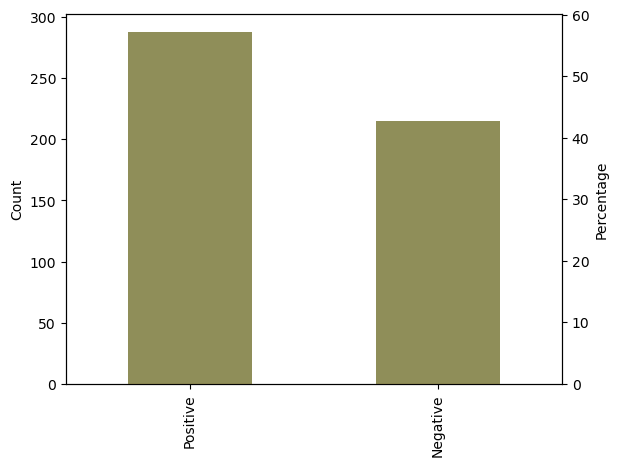

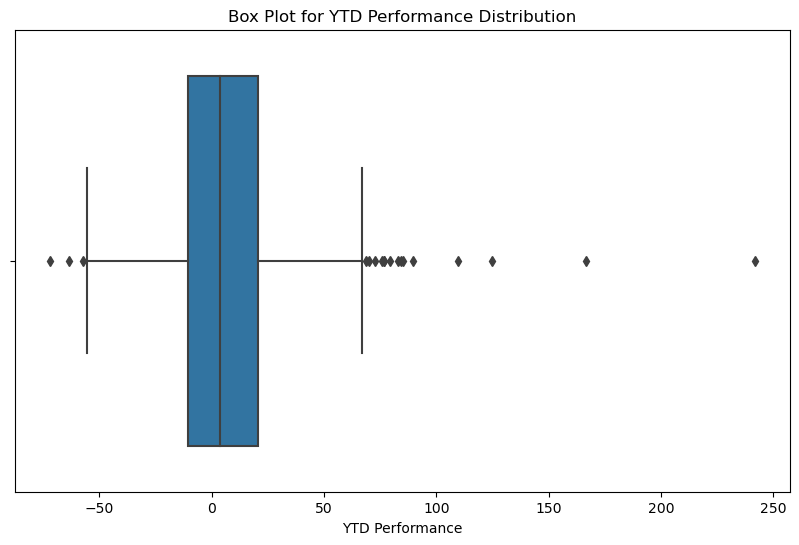

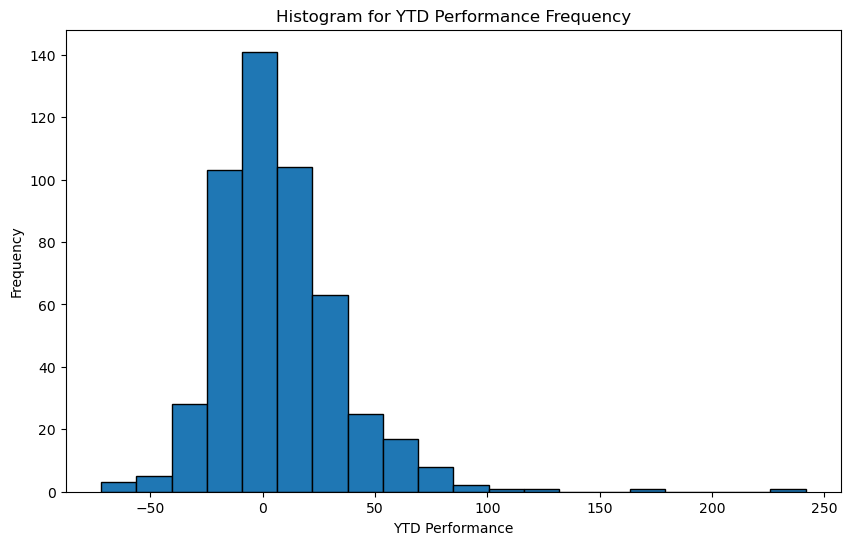

Top 10 Positive Returns:
    Ticker  Start Price  Last Closed Price  YTD Performance
349   NVDA   143.099091         488.880005       241.637395
313   META   124.739998         332.709991       166.722781
444   TSLA   108.099998         242.839996       124.643848
408    RCL    48.709999         102.099998       109.607884
388    PHM    45.874649          87.040001        89.734424
362   PANW   138.449997         256.179993        85.034307
26     AMD    64.019997         118.000000        84.317410
90     CCL     7.970000          14.570000        82.810541
77    AVGO   543.651794         975.400024        79.416317
46    ANET   120.910004         213.740005        76.776114

Bottom 10 Negative Returns:
    Ticker  Start Price  Last Closed Price  YTD Performance
7      ADP   233.787125         230.460007        -1.423140
342   NDSN   235.988663         233.550003        -1.033380
204      F    10.570135          10.470000        -0.947337
384    PRU    95.473099          94.610001    

In [11]:
# Call the plotting functions and summarize returns
summarize_returns(results_df)